#  Exercise 6 | Support Vector Machines

<Break> <Break>
<B> Building a spam classifier using Support Vector Machine (SVM) </B>

In this notebook, we will do <ol>
<li> SVM's on two dimensional data </li>
<li> preprocessing on set of raw emails </li>
<li> build a classifier on the emails using an SVM </li>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sklearn.svm

In [3]:
%matplotlib inline

## Part 1: Loading and Visualizing Data
  We start the exercise by first loading and visualizing the dataset. 
  The following code will load the dataset into your environment and plot
  the data.



In [4]:
ex6data1 = scipy.io.loadmat('ex6data1.mat')
X = ex6data1['X']
y = ex6data1['y'][:, 0]

/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


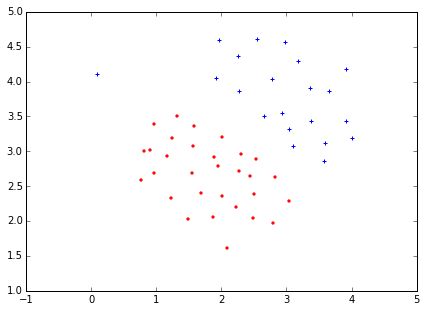

In [5]:
def plot_data(X, y, ax=None):
    if ax == None:
        fig, ax = plt.subplots(figsize=(7,5))
    pos = y==1
    neg = y==0
    ax.scatter(X[pos,0], X[pos,1], marker='+', color='b')
    ax.scatter(X[neg,0], X[neg,1], marker='o', color='r', s=5)
plot_data(X, y)

<b> We can clearly observe that there is a decision boundary between the two sets of data. </b>

## Part 2: Training Linear SVM 
  The following code will train a linear SVM on the dataset and plot the
  decision boundary learned.
  
   You should try to change the C value below and see how the decision
 boundary varies (e.g., try C = 1000)



In [6]:
from sklearn import svm 

svm = svm.LinearSVC(C=1, max_iter = 1000)
svm.fit(X, y)
np.mean(svm.predict(X) == y)

0.98039215686274506

In [7]:
svm.coef_

array([[ 0.44886649,  0.76397873]])

/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


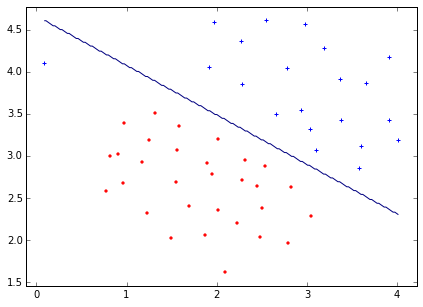

In [9]:
# Plot the decision boundary 


fig, ax = plt.subplots(figsize=(7,5))

def draw_contour(X, model):
    x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 200)
    x2 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 200)

    xx1, xx2 = np.meshgrid(x1, x2)
    yy = model.predict(np.c_[xx1.flat, xx2.flat]).reshape(xx1.shape)
    ax.contour(x1, x2, yy, levels=[0.5])
    
plot_data(X, y, ax)
draw_contour(X, svm)

## Part 3: Implementing Gaussian Kernel 
  You will now implement the Gaussian kernel to use
  with the SVM. You should complete the code in gaussianKernel. This notebook will not use it, however. An sklearn custom kernel should return a matrix of all kernel values. Feel free to implement gaussianKernel in the sklearn way, and later call svm.SVC(kernel=gaussianKernel).


In [10]:
def gaussianKernel(x1, x2, sigma):
    # ====================== YOUR CODE HERE ======================
    # Instructions: Fill in this function to return the similarity between x1
    #               and x2 computed using a Gaussian kernel with bandwidth
    #               sigma
    #
    #
    
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
    
    # =============================================================
    

The Gaussian Kernel between `x1 = [1; 2; 1]`, `x2 = [0; 4; -1]`, `sigma = 2` should be about `0.324652`.

In [11]:
gaussianKernel(x1=np.array([1, 2,  1]), x2=np.array([0, 4, -1]), sigma=2)

0.32465246735834974

## Part 4: Visualizing Dataset 2 
  The following code will load the next dataset into your environment and 
  plot the data. 


In [12]:
ex6data2 = scipy.io.loadmat('ex6data2.mat')
X = ex6data2['X']
y = ex6data2['y'][:,0]
print(X.shape, y.shape)

(863, 2) (863,)


/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


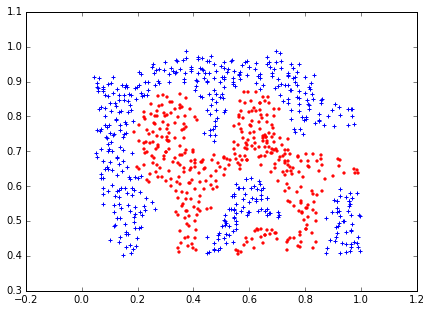

In [13]:
plot_data(X, y)

## Part 5: Training SVM with RBF Kernel (Dataset 2) 
  After you have implemented the kernel, we can now use it to train the 
  SVM classier.
  
  Note that this doesn't do this, it simply uses the built-in gaussian kernel in sklearn.
 

In [14]:
model = sklearn.svm.SVC(C=1, gamma=100, kernel='rbf')
model.fit(X, y)
np.mean((model.predict(X) == y))

0.99768250289687133

/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


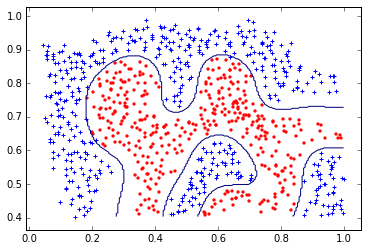

In [15]:
fig, ax = plt.subplots()
plot_data(X, y, ax)
draw_contour(X, model)

## Part 6: Visualizing Dataset 3 
  The following code will load the next dataset into your environment and 
  plot the data. 


In [16]:
ex6data3 = scipy.io.loadmat('ex6data3.mat')
X = ex6data3['X']
y = ex6data3['y'][:, 0]
Xval = ex6data3['Xval']
yval = ex6data3['yval'][:, 0]

print(X.shape, y.shape, Xval.shape, yval.shape)

(211, 2) (211,) (200, 2) (200,)


/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


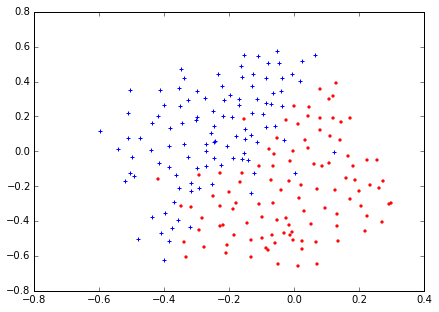

In [17]:
plot_data(X, y)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


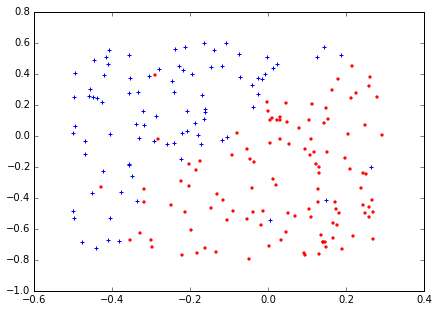

In [18]:
plot_data(Xval, yval)

## Part 7: Training SVM with RBF Kernel (Dataset 3) 

  This is a different dataset that you can use to experiment with. Try
  different values of C and sigma here, train a classifier on your training data, measure the cross validation error and find the values for C and sigma that minimize the cross validation error.
 


In [23]:
import itertools
from sklearn import svm
possible_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
possible_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
cv_errors = np.zeros((len(possible_C), len(possible_gamma)))

# YOUR CODE GOES HERE

C = 7
gamma = 7

best_score =0
best_params = { 'C': None , 'gamma': None}

for C in possible_C:
    for gamma in possible_gamma:
        
        svc = svm.SVC(C = C , gamma = gamma)
        svc.fit(X,y)
        score = svc.score(Xval,yval)

        if score > best_score :
            best_score = score
            best_params['C'] = C
            best_params['gamaa'] = gamma
            
best_score,best_params

# ==================

(0.96499999999999997, {'C': 0.3, 'gamaa': 100, 'gamma': None})

/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/root/anaconda3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


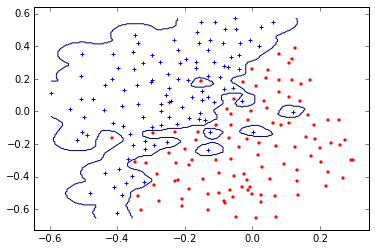

In [24]:
model = sklearn.svm.SVC(C=C, gamma=gamma, kernel='rbf')
model.fit(X, y)
fig, ax = plt.subplots()
plot_data(X, y, ax)
draw_contour(X, model)

## Part 8: Building a spam classifier with the dataset

In [26]:
spam_train = scipy.io.loadmat('spamTrain.mat')
spam_test  = scipy.io.loadmat('spamTest.mat')

spam_train

{'X': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:27:25 2011',
 '__version__': '1.0',
 'y': array([[1],
        [1],
        [0],
        ..., 
        [1],
        [0],
        [0]], dtype=uint8)}

In [28]:
X = spam_train['X']
Xtest = spam_test['Xtest']
y = spam_train['y'].ravel()
ytest = spam_test['ytest'].ravel()

X.shape, y.shape, Xtest.shape , ytest.shape


((4000, 1899), (4000,), (1000, 1899), (1000,))

<B> Observe that there are 4000 documents an each document has 1,899 dimensions corresponding to 1,8999 words in the vocabulary. The values are binary indicating presence or absence accordingly. We are now about to fit the data.

In [32]:
svc = svm.SVC()
svc.fit(X,y)
accuracy = svc.score(X,y)*100
print("Training accuracy % :")
print(accuracy)

Training accuracy % :
94.4


In [34]:
print("Testing accuracy %  :")
accuracy = svc.score(Xtest,ytest)*100
print(accuracy)

Testing accuracy %  :
95.3
